In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [69]:
#CSV File
df = pd.read_csv("cleaned_mode.csv")

Based on Education

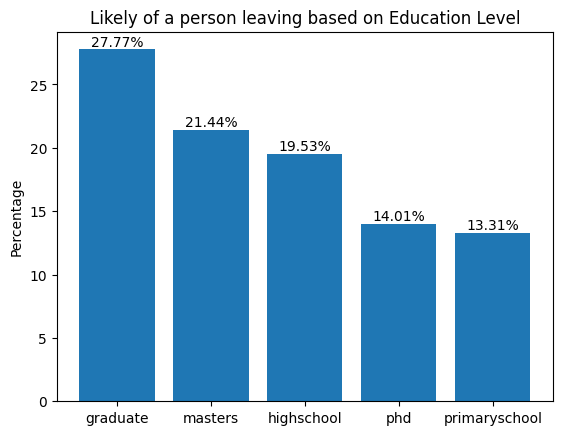

In [70]:
# Extract unique column values first
column_values = df['education_level'].unique()

# Create the column mapping dictionary
column_mapping = {column_value: column_value.lower().replace(' ', '') for column_value in column_values}

# Calculate the total counts
total_counts = {}
total_with_target_1 = {}
percentages = {}

for column_value, label in column_mapping.items():
    total_counts[label] = df[df['education_level'] == column_value].shape[0]
    total_with_target_1[label] = df[(df['education_level'] == column_value) & (df['target'] == 1)].shape[0]
    percentages[label] = (total_with_target_1[label] / total_counts[label]) * 100

# Create a bar chart
labels = list(column_mapping.values())
values = list(percentages.values())

plt.bar(labels, values)

# Add percentage values to the bar chart
for i in range(len(labels)):
    plt.text(i, values[i], f"{values[i]:.2f}%", ha='center', va='bottom')

# Set the y-axis label
plt.ylabel('Percentage')

# Set the title of the chart
plt.title('Likely of a person leaving based on Education Level')

#Save
plt.savefig('Basedon_Education.png')

# Display
plt.show()



Based on Company Size

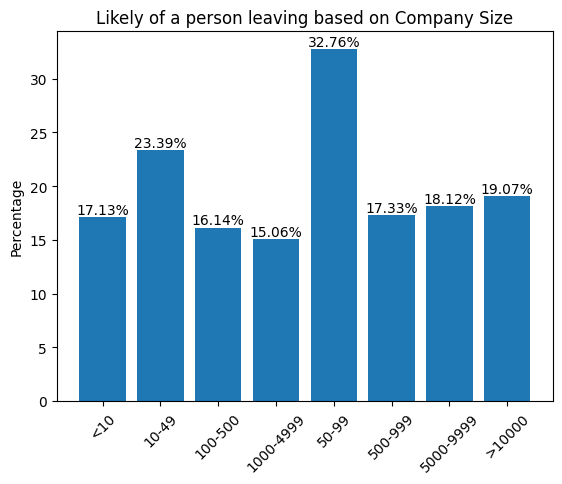

In [71]:
# Extract unique column values first
column_values = df['company_size'].unique()

# Create the column mapping dictionary
column_mapping = {column_value: column_value.lower().replace(' ', '') for column_value in column_values}

# Calculate the total counts
total_counts = {}
total_with_target_1 = {}
percentages = {}

for column_value, label in column_mapping.items():
    total_counts[label] = df[df['company_size'] == column_value].shape[0]
    total_with_target_1[label] = df[(df['company_size'] == column_value) & (df['target'] == 1)].shape[0]
    percentages[label] = (total_with_target_1[label] / total_counts[label]) * 100

# Create a bar chart
labels = list(column_mapping.values())
values = list(percentages.values())

# Manually have to sort the labels to place "<10" at the beginning and ">10000" at the end
labels_sorted = sorted(labels, key=lambda x: (x != '<10', x))

# Reorder the values based on the sorted labels
values_sorted = [values[labels.index(label)] for label in labels_sorted]

plt.bar(labels_sorted, values_sorted)

# Add percentage values to the bar chart
for i in range(len(labels_sorted)):
    plt.text(i, values_sorted[i], f"{values_sorted[i]:.2f}%", ha='center', va='bottom')

# Y axis label
plt.ylabel('Percentage')

# Title
plt.title('Likely of a person leaving based on Company Size')

# Tilt the x-axis labels
plt.xticks(rotation=45)

#Save
plt.savefig('Basedon_CompanySize.png')

# Display the chart
plt.show()

Relevant Experience

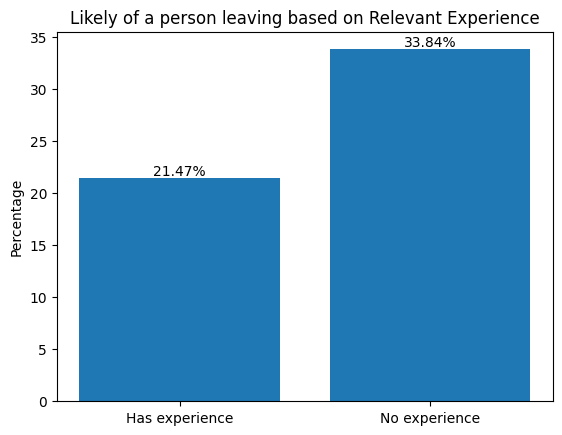

In [72]:
# # Extract unique column values first
column_values = df['relevent_experience'].unique()

# Create the column mapping dictionary
column_mapping = {1: 'Has experience', 0: 'No experience'}

# Calculate the total counts
total_counts = {}
total_with_target_1 = {}
percentages = {}

for column_value, label in column_mapping.items():
    total_counts[label] = df[df['relevent_experience'] == column_value].shape[0]
    total_with_target_1[label] = df[(df['relevent_experience'] == column_value) & (df['target'] == 1)].shape[0]
    percentages[label] = (total_with_target_1[label] / total_counts[label]) * 100

# Create a bar chart
labels = list(column_mapping.values())
values = list(percentages.values())

plt.bar(labels, values)

# Add percentage values to the bar chart
for i in range(len(labels)):
    plt.text(i, values[i], f"{values[i]:.2f}%", ha='center', va='bottom')

# Y axis
plt.ylabel('Percentage')

# Title
plt.title('Likely of a person leaving based on Relevant Experience')

#Save
plt.savefig('Basedon_Relevant_Exp.png')

# Display the chart
plt.show()



City_Index

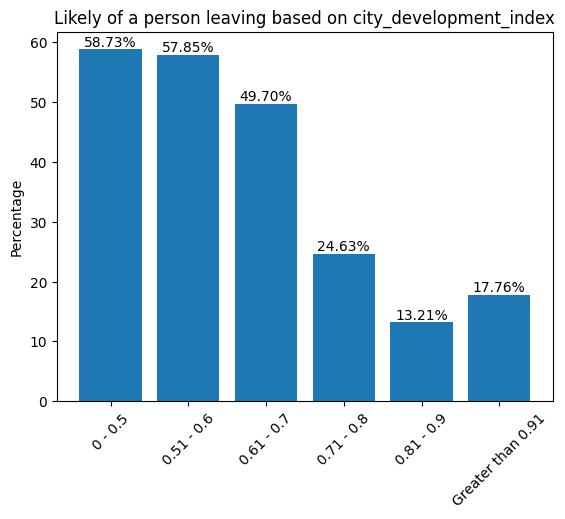

In [79]:
# Need to define bin ranges first
bin_ranges = [
    (0, 0.50),
    (0.51, 0.60),
    (0.61, 0.70),
    (0.71, 0.80),
    (0.81, 0.90),
    (0.91, float('inf'))
]

# Create the column mapping dictionary with the bins
column_mapping = {}
for i, (start, end) in enumerate(bin_ranges):
    if end == float('inf'):
        label = f"Greater than {start}"
    else:
        label = f"{start} - {end}"
    column_mapping[i] = label

# Calculate the total counts
total_counts = {}
total_with_target_1 = {}
percentages = {}

for i, (start, end) in enumerate(bin_ranges):
    if end == float('inf'):
        total_counts[column_mapping[i]] = df[df['city_development_index'] > start].shape[0]
        total_with_target_1[column_mapping[i]] = df[(df['city_development_index'] > start) & (df['target'] == 1)].shape[0]
    else:
        total_counts[column_mapping[i]] = df[(df['city_development_index'] >= start) & (df['city_development_index'] <= end)].shape[0]
        total_with_target_1[column_mapping[i]] = df[(df['city_development_index'] >= start) & (df['city_development_index'] <= end) & (df['target'] == 1)].shape[0]

    # Calculate percentages only if the count is not zero
    if total_counts[column_mapping[i]] != 0:
        percentages[column_mapping[i]] = (total_with_target_1[column_mapping[i]] / total_counts[column_mapping[i]]) * 100
    else:
        percentages[column_mapping[i]] = 0

# Create a bar chart
labels = list(column_mapping.values())
values = list(percentages.values())

plt.bar(labels, values)

# Add percentage values to the bar chart
for i in range(len(labels)):
    plt.text(i, values[i], f"{values[i]:.2f}%", ha='center', va='bottom')

# Y axis 
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Title
plt.title('Likely of a person leaving based on city_development_index')

#Save
plt.savefig('Basedon_CDI1.png')

# Display
plt.show()

In [74]:
#Determining which binning makes sense for city index
counts1 = pd.cut(df['city_development_index'], bins=[0, 0.5, 0.6, 0.7, 0.8, 0.9, float('inf')], labels=['<0.5', '0.51-0.6', '0.61-0.7', '0.71-0.8', '0.81-0.9', '>0.9']).value_counts()
counts2 = pd.cut(df['city_development_index'], bins=[float('-inf'), 0.7, 0.8, 0.9, float('inf')], labels=['<0.7', '0.71-0.8', '0.81-0.9', '>0.9']).value_counts()
counts3 = pd.cut(df['city_development_index'], bins=[float('-inf'), 0.7, 0.9, float('inf')], labels=['<0.7', '0.71-0.9', '>0.9']).value_counts()
counts4 = pd.cut(df['city_development_index'], bins=[float('-inf'), 0.9, float('inf')], labels=['<0.9', '>0.9']).value_counts()


print(counts1)
print()
print(counts2)
print()
print(counts3)
print()
print(counts4)

city_development_index
>0.9        9643
0.61-0.7    3831
0.81-0.9    3549
0.71-0.8    1410
0.51-0.6     662
<0.5          63
Name: count, dtype: int64

city_development_index
>0.9        9643
<0.7        4556
0.81-0.9    3549
0.71-0.8    1410
Name: count, dtype: int64

city_development_index
>0.9        9643
0.71-0.9    4959
<0.7        4556
Name: count, dtype: int64

city_development_index
>0.9    9643
<0.9    9515
Name: count, dtype: int64


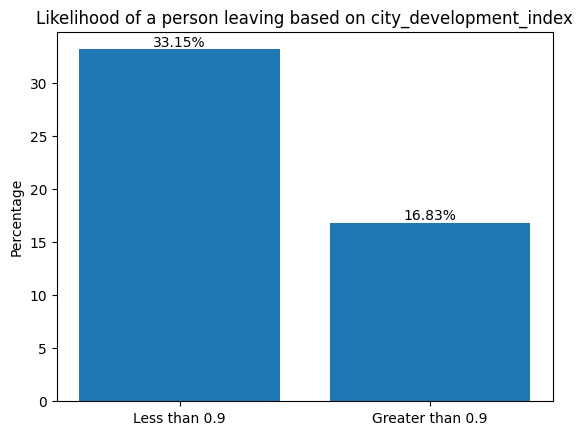

In [77]:
# Defining bin range for 2 range
bin_ranges = [
    (0, 0.9),
    (0.9, float('inf'))
]

# Created the column mapping dictionary with the bins
column_mapping = {}
for i, (start, end) in enumerate(bin_ranges):
    if end == float('inf'):
        label = f"Greater than {start}"
    else:
        label = f"Less than {end}"
    column_mapping[i] = label

# Calculate the total counts
total_counts = {}
total_with_target_1 = {}
percentages = {}

for i, (start, end) in enumerate(bin_ranges):
    if end == float('inf'):
        total_counts[column_mapping[i]] = df[df['city_development_index'] > start].shape[0]
        total_with_target_1[column_mapping[i]] = df[(df['city_development_index'] > start) & (df['target'] == 1)].shape[0]
    else:
        total_counts[column_mapping[i]] = df[(df['city_development_index'] >= start) & (df['city_development_index'] < end)].shape[0]
        total_with_target_1[column_mapping[i]] = df[(df['city_development_index'] >= start) & (df['city_development_index'] < end) & (df['target'] == 1)].shape[0]

    # Calculate percentages only if the count is not zero
    if total_counts[column_mapping[i]] != 0:
        percentages[column_mapping[i]] = (total_with_target_1[column_mapping[i]] / total_counts[column_mapping[i]]) * 100
    else:
        percentages[column_mapping[i]] = 0

labels = list(column_mapping.values())
values = list(percentages.values())

plt.bar(labels, values)

# Adding percentage values to the bar chart
for i in range(len(labels)):
    plt.text(i, values[i], f"{values[i]:.2f}%", ha='center', va='bottom')

# Y-axis
plt.ylabel('Percentage')

# Title
plt.title('Likelihood of a person leaving based on city_development_index')

#Save
plt.savefig('Basedon_CDI2.png')

# Display
plt.show()

Top 4 Factors on why a person is more likely to leave

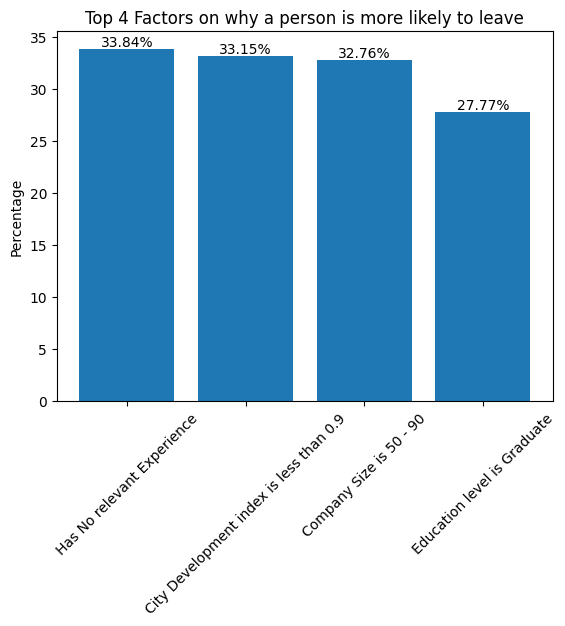

In [80]:
# Data for the bar chart summary
x_values = ['Education level', 'Company Size', 'Relevant Experience', 'City Development index']
y_values = [27.77, 32.76, 33.84, 33.15]

# Sorting in descending order
sorted_indices = sorted(range(len(y_values)), key=lambda k: y_values[k], reverse=True)
x_values_sorted = [x_values[i] for i in sorted_indices]
y_values_sorted = [y_values[i] for i in sorted_indices]

# X-axis labels
x_labels = [
    'Education level is Graduate',
    'Company Size is 50 - 90',
    'Has No relevant Experience',
    'City Development index is less than 0.9'
]

# Sorting x-axis labels
x_labels_sorted = [x_labels[i] for i in sorted_indices]

# Plotting bar chart
plt.bar(x_values_sorted, y_values_sorted)

# X-axis labels
plt.xticks(x_values_sorted, x_labels_sorted, rotation=45)

# Adding the percentage values to the graph
for i in range(len(x_values_sorted)):
    plt.text(x_values_sorted[i], y_values_sorted[i], f"{y_values_sorted[i]:.2f}%", ha='center', va='bottom')

# Y axis
plt.ylabel('Percentage')

# Title
plt.title('Top 4 Factors on why a person is more likely to leave')

#Save
plt.savefig('Top4.png')

# Display
plt.show()